## License
This file is part of the project hyperMusic. All of hyperMusic code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. hyperMusic is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with hyperMusic. If not, see <https://www.gnu.org/licenses/>.

In [2]:
import os
import glob

import bct as bct
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

## Hyperbrain Grand Networks

In [3]:
# Load them all files gurl yas kween <3
file_list = glob.glob('/Users/hectorOrozco/Desktop/hM_analysis/output/csv_grand_matrices/P03/*.csv')
grand_df = pd.read_csv(file_list[0], index_col = 0)

for file in file_list[1:]:
    temp = pd.read_csv(file, index_col = 0)
    grand_df = grand_df.append(temp)
grand_df.head()    

,sub_source,sub_target,sub_leader,freq_source,sub_follower,freq_target,neuro_source,neuro_target,duo_type,piece,trial,pair,ste
0,4B,4B,4B,alpha,3A,alpha,Prefrontal Left,Prefrontal Left,h,mel,1,P03,0.000000
1,4B,4B,4B,alpha,3A,alpha,Prefrontal Left,Prefrontal Right,h,mel,1,P03,0.000406
2,4B,4B,4B,alpha,3A,alpha,Prefrontal Left,Motor Left,h,mel,1,P03,0.002284
3,4B,4B,4B,alpha,3A,alpha,Prefrontal Left,Motor Right,h,mel,1,P03,0.000914
4,4B,4B,4B,alpha,3A,alpha,Prefrontal Left,Insula Left,h,mel,1,P03,0.002523


In [4]:
def info_direction(row):
    if row['sub_source'] == row['sub_leader'] and row['sub_target'] == row['sub_leader']:
        return 'leader_to_leader'
    elif row['sub_source'] == row['sub_leader'] and row['sub_target'] == row['sub_follower']:
        return 'leader_to_follower'
    elif row['sub_source'] == row['sub_follower'] and row['sub_target'] == row['sub_leader']:
        return 'follower_to_leader'
    else:
        return 'follower_to_follower'
    
def info_source(row):
    if row['sub_source'] == row['sub_leader']: 
        return 'leader'
    else:
        return 'follower'


def info_target(row):
    if row['sub_target'] == row['sub_leader']:
        return 'leader'
    else:
        return 'follower'
    
grand_df['info_source'] = grand_df.apply(info_source, axis = 1)
grand_df['info_target'] = grand_df.apply(info_target, axis = 1)

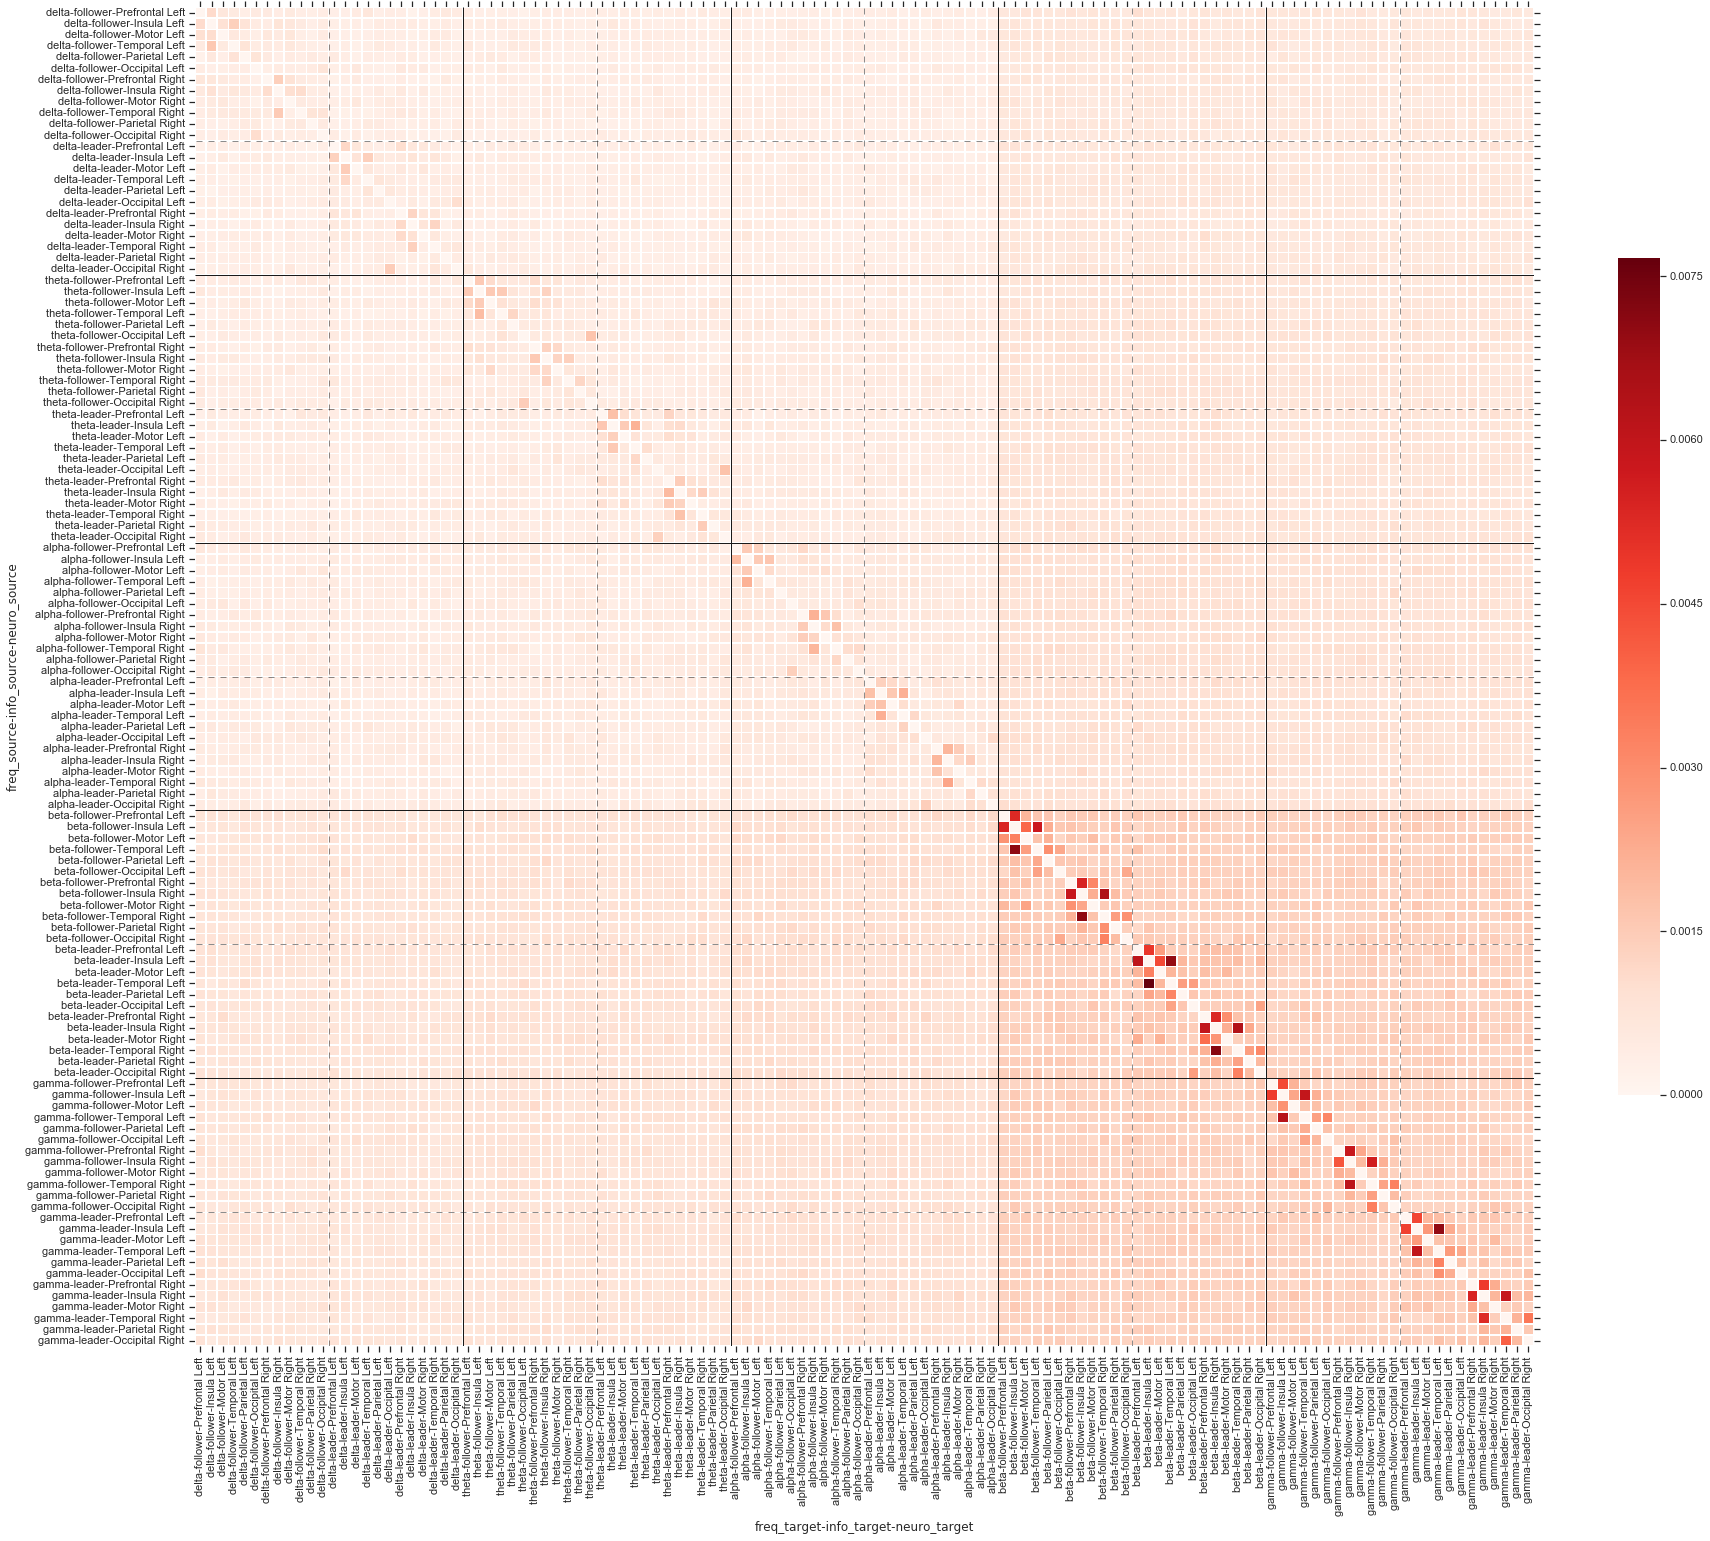

In [149]:
sources_aranged = ['Prefrontal Left', 'Insula Left', 'Motor Left', 'Temporal Left', 'Parietal Left', 'Occipital Left',
                   'Prefrontal Right', 'Insula Right', 'Motor Right', 'Temporal Right', 'Parietal Right', 'Occipital Right']
freq_aranged = ['delta', 'theta', 'alpha', 'beta', 'gamma']
polyphonic_matrix = grand_df[grand_df['duo_type'] == 'p']
polyphonic_matrix.loc[:, 'neuro_source'] = pd.Categorical(polyphonic_matrix['neuro_source'], 
                                                  categories=sources_aranged, ordered = True)
polyphonic_matrix.loc[:, 'neuro_target'] = pd.Categorical(polyphonic_matrix['neuro_target'], 
                                                  categories=sources_aranged, ordered = True)
polyphonic_matrix.loc[:, 'freq_source'] = pd.Categorical(polyphonic_matrix['freq_source'], 
                                                  categories=freq_aranged, ordered = True)
polyphonic_matrix.loc[:, 'freq_target'] = pd.Categorical(polyphonic_matrix['freq_target'], 
                                                  categories=freq_aranged, ordered = True)
polyphonic_matrix = polyphonic_matrix.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean)
fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap(polyphonic_matrix, cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.hlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.vlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.vlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.show()

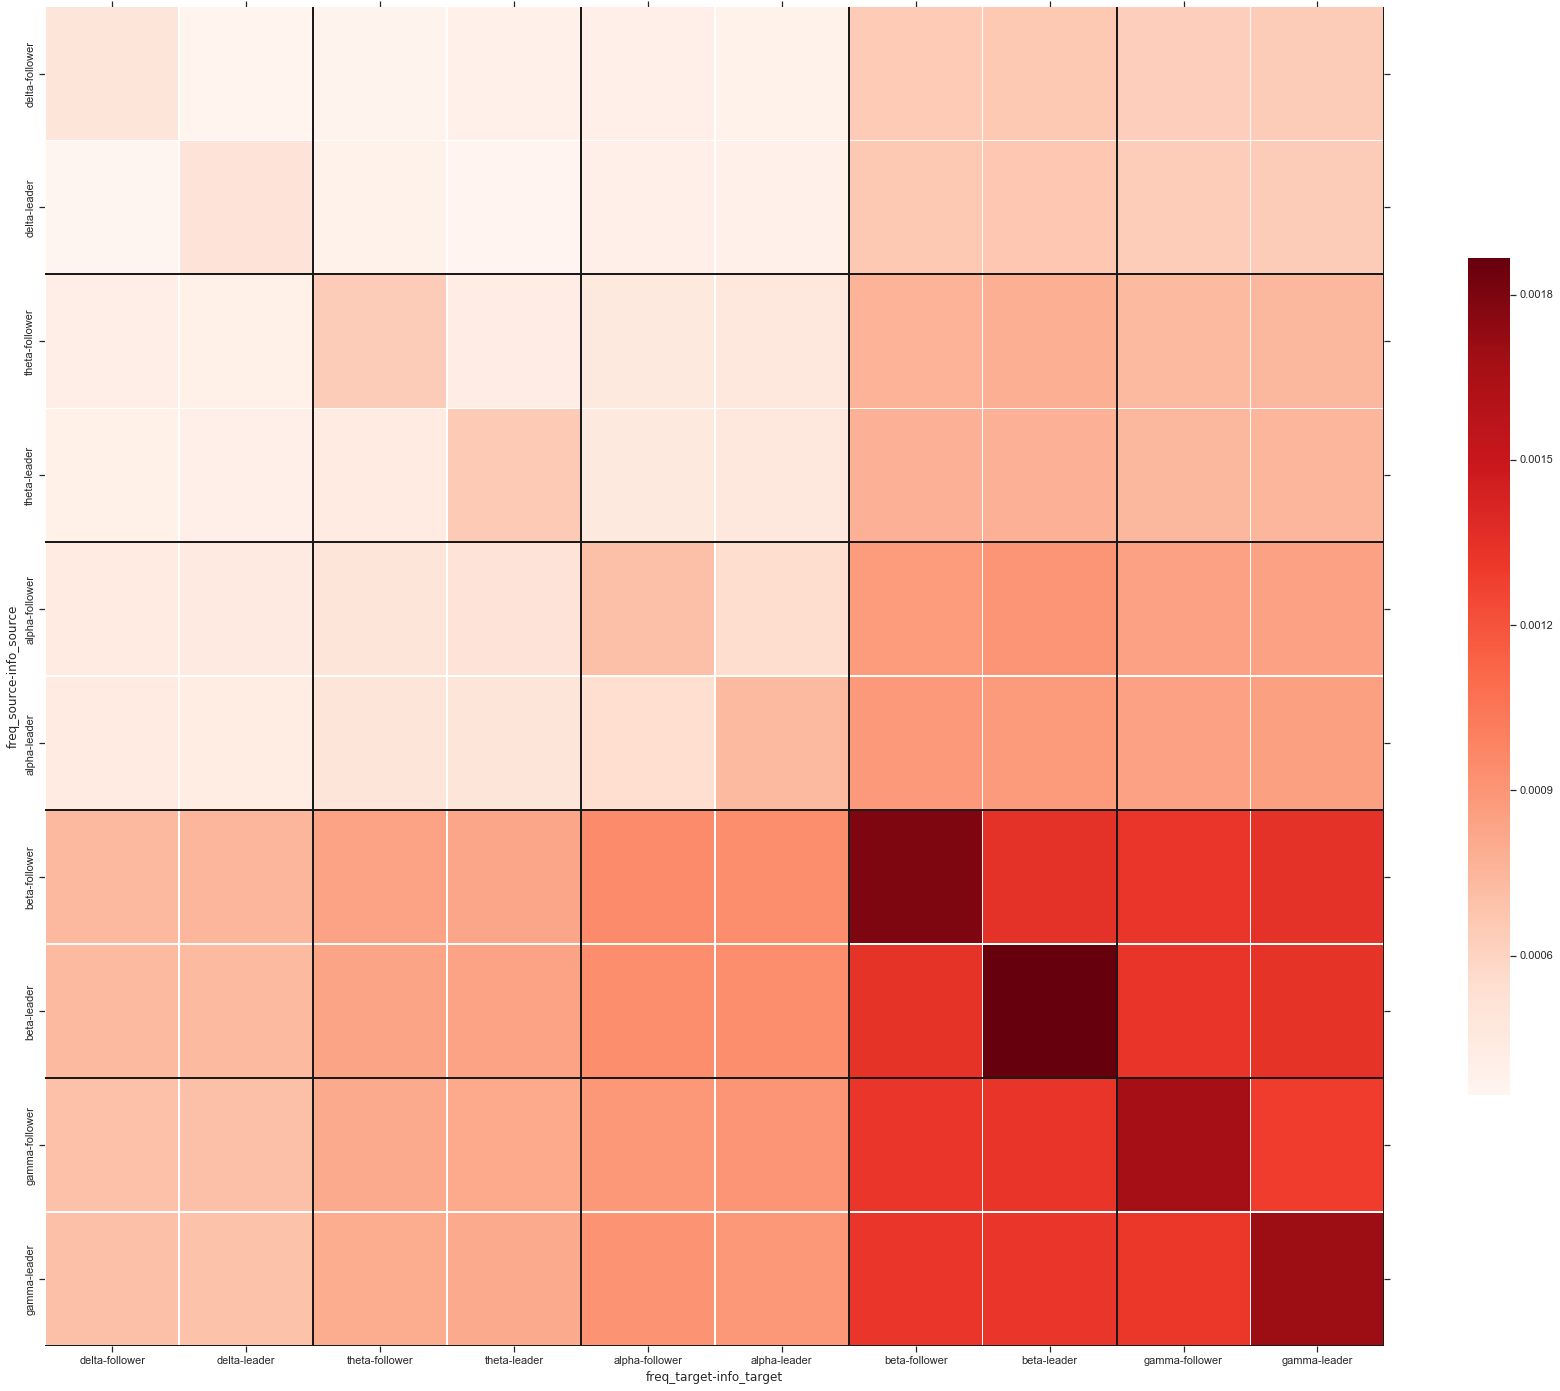

In [175]:
polyphonic_matrix = grand_df[grand_df['duo_type'] == 'p']
polyphonic_matrix.loc[:, 'neuro_source'] = pd.Categorical(polyphonic_matrix['neuro_source'], 
                                                  categories=sources_aranged, ordered = True)
polyphonic_matrix.loc[:, 'neuro_target'] = pd.Categorical(polyphonic_matrix['neuro_target'], 
                                                  categories=sources_aranged, ordered = True)
polyphonic_matrix.loc[:, 'freq_source'] = pd.Categorical(polyphonic_matrix['freq_source'], 
                                                  categories=freq_aranged, ordered = True)
polyphonic_matrix.loc[:, 'freq_target'] = pd.Categorical(polyphonic_matrix['freq_target'], 
                                                  categories=freq_aranged, ordered = True)
polyphonic_matrix = polyphonic_matrix.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean)
polyphonic_matrix_frequencies = polyphonic_matrix.mean(level= ['freq_source', 'info_source'] ).transpose().mean(level= ['freq_target', 'info_target']).transpose()
fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap(polyphonic_matrix_frequencies, cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.vlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.show()

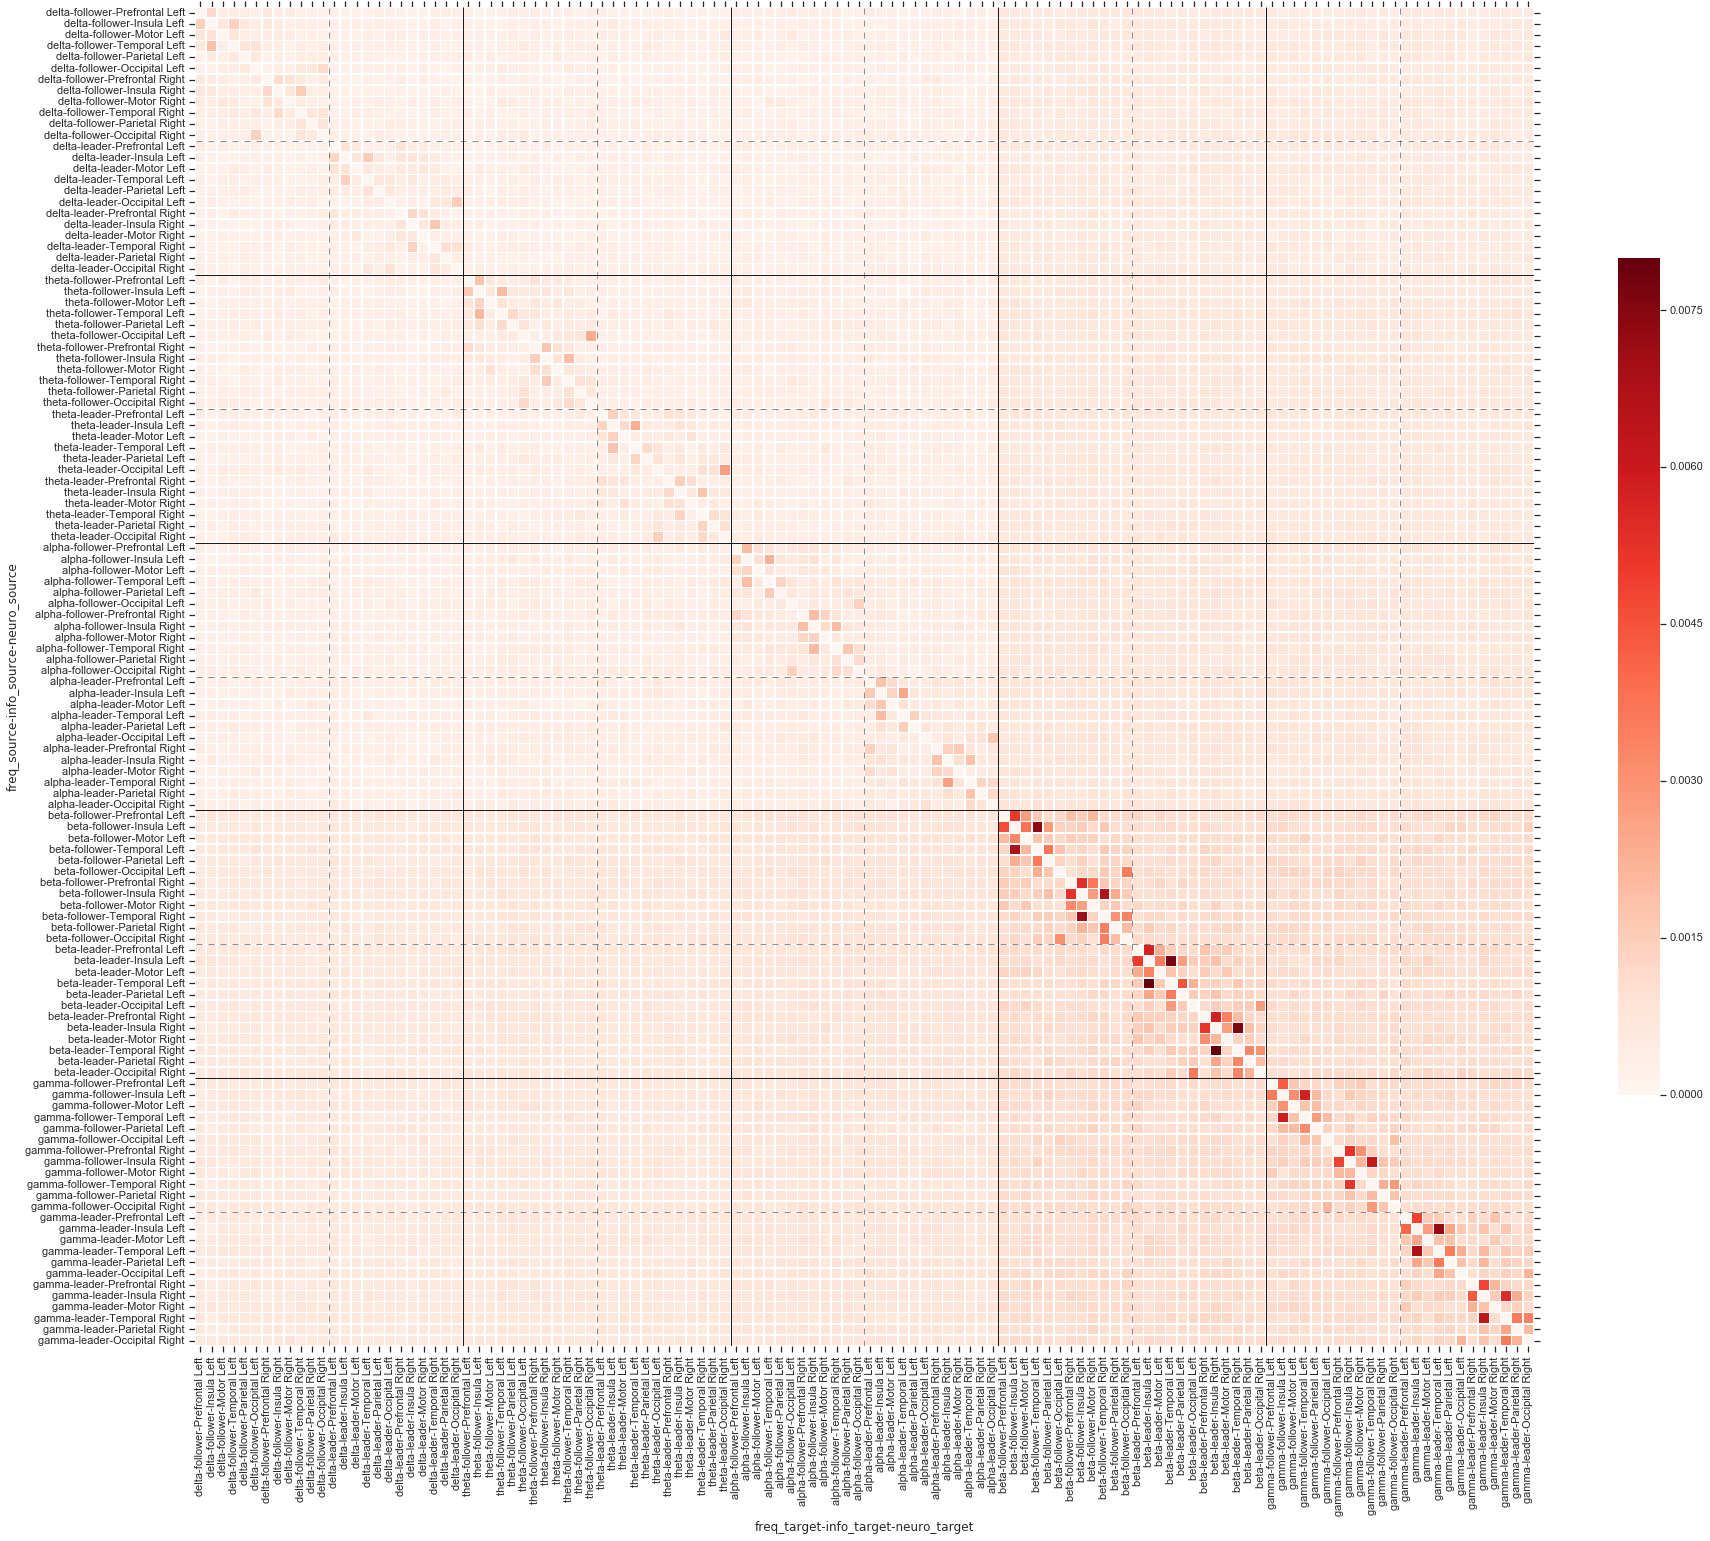

In [169]:
homophonic_matrix = grand_df[grand_df['duo_type'] == 'h']
homophonic_matrix.loc[:, 'neuro_source'] = pd.Categorical(homophonic_matrix['neuro_source'], 
                                                  categories=sources_aranged, ordered = True)
homophonic_matrix.loc[:, 'neuro_target'] = pd.Categorical(homophonic_matrix['neuro_target'], 
                                                  categories=sources_aranged, ordered = True)
homophonic_matrix.loc[:, 'freq_source'] = pd.Categorical(homophonic_matrix['freq_source'], 
                                                  categories=freq_aranged, ordered = True)
homophonic_matrix.loc[:, 'freq_target'] = pd.Categorical(homophonic_matrix['freq_target'], 
                                                  categories=freq_aranged, ordered = True)
homophonic_matrix = homophonic_matrix.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean)

fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap(homophonic_matrix, cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.hlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.vlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.vlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.show()

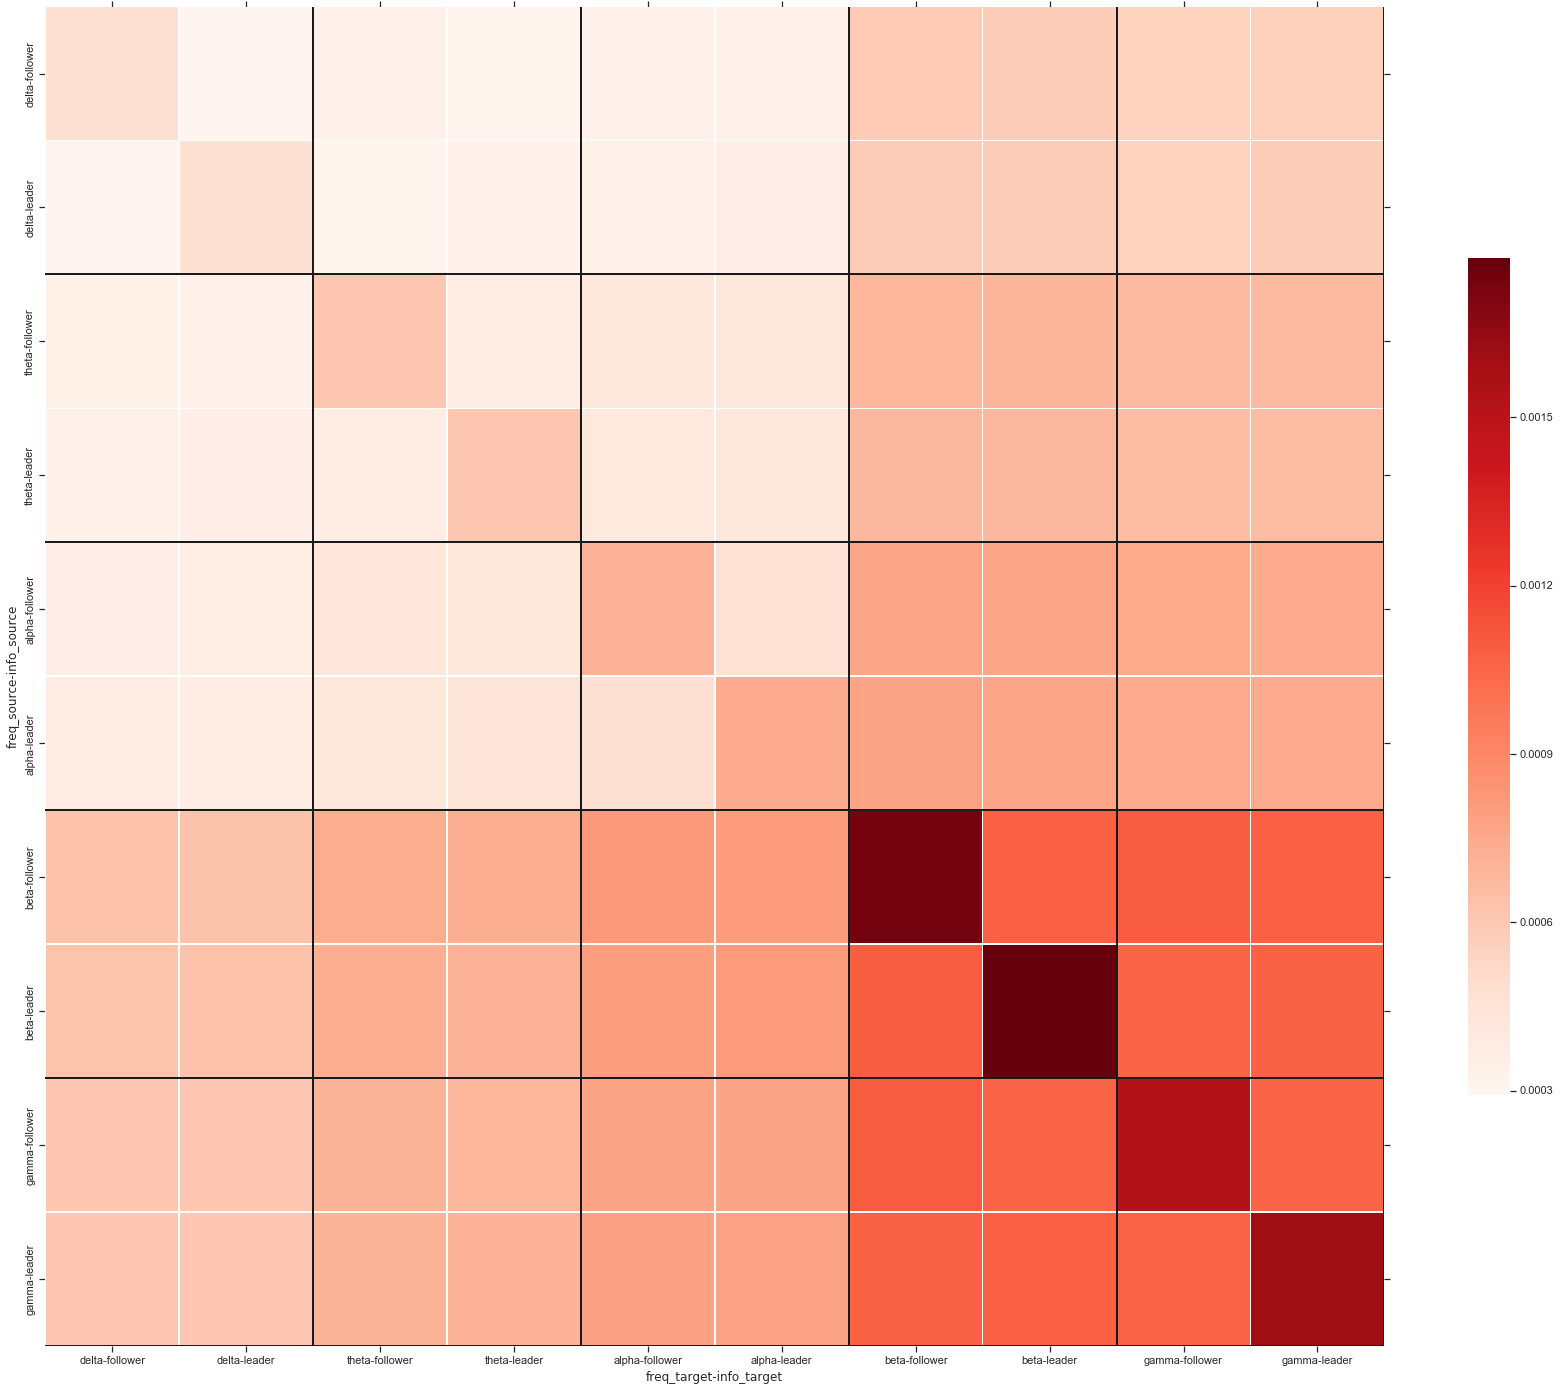

In [176]:
homophonic_matrix = grand_df[grand_df['duo_type'] == 'h']
homophonic_matrix.loc[:, 'neuro_source'] = pd.Categorical(homophonic_matrix['neuro_source'], 
                                                  categories=sources_aranged, ordered = True)
homophonic_matrix.loc[:, 'neuro_target'] = pd.Categorical(homophonic_matrix['neuro_target'], 
                                                  categories=sources_aranged, ordered = True)
homophonic_matrix.loc[:, 'freq_source'] = pd.Categorical(homophonic_matrix['freq_source'], 
                                                  categories=freq_aranged, ordered = True)
homophonic_matrix.loc[:, 'freq_target'] = pd.Categorical(homophonic_matrix['freq_target'], 
                                                  categories=freq_aranged, ordered = True)
homophonic_matrix = homophonic_matrix.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean)

homophonic_matrix_frequencies = homophonic_matrix.mean(level= ['freq_source', 'info_source'] ).transpose().mean(level= ['freq_target', 'info_target']).transpose()
fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap(homophonic_matrix_frequencies, cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.vlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.show()

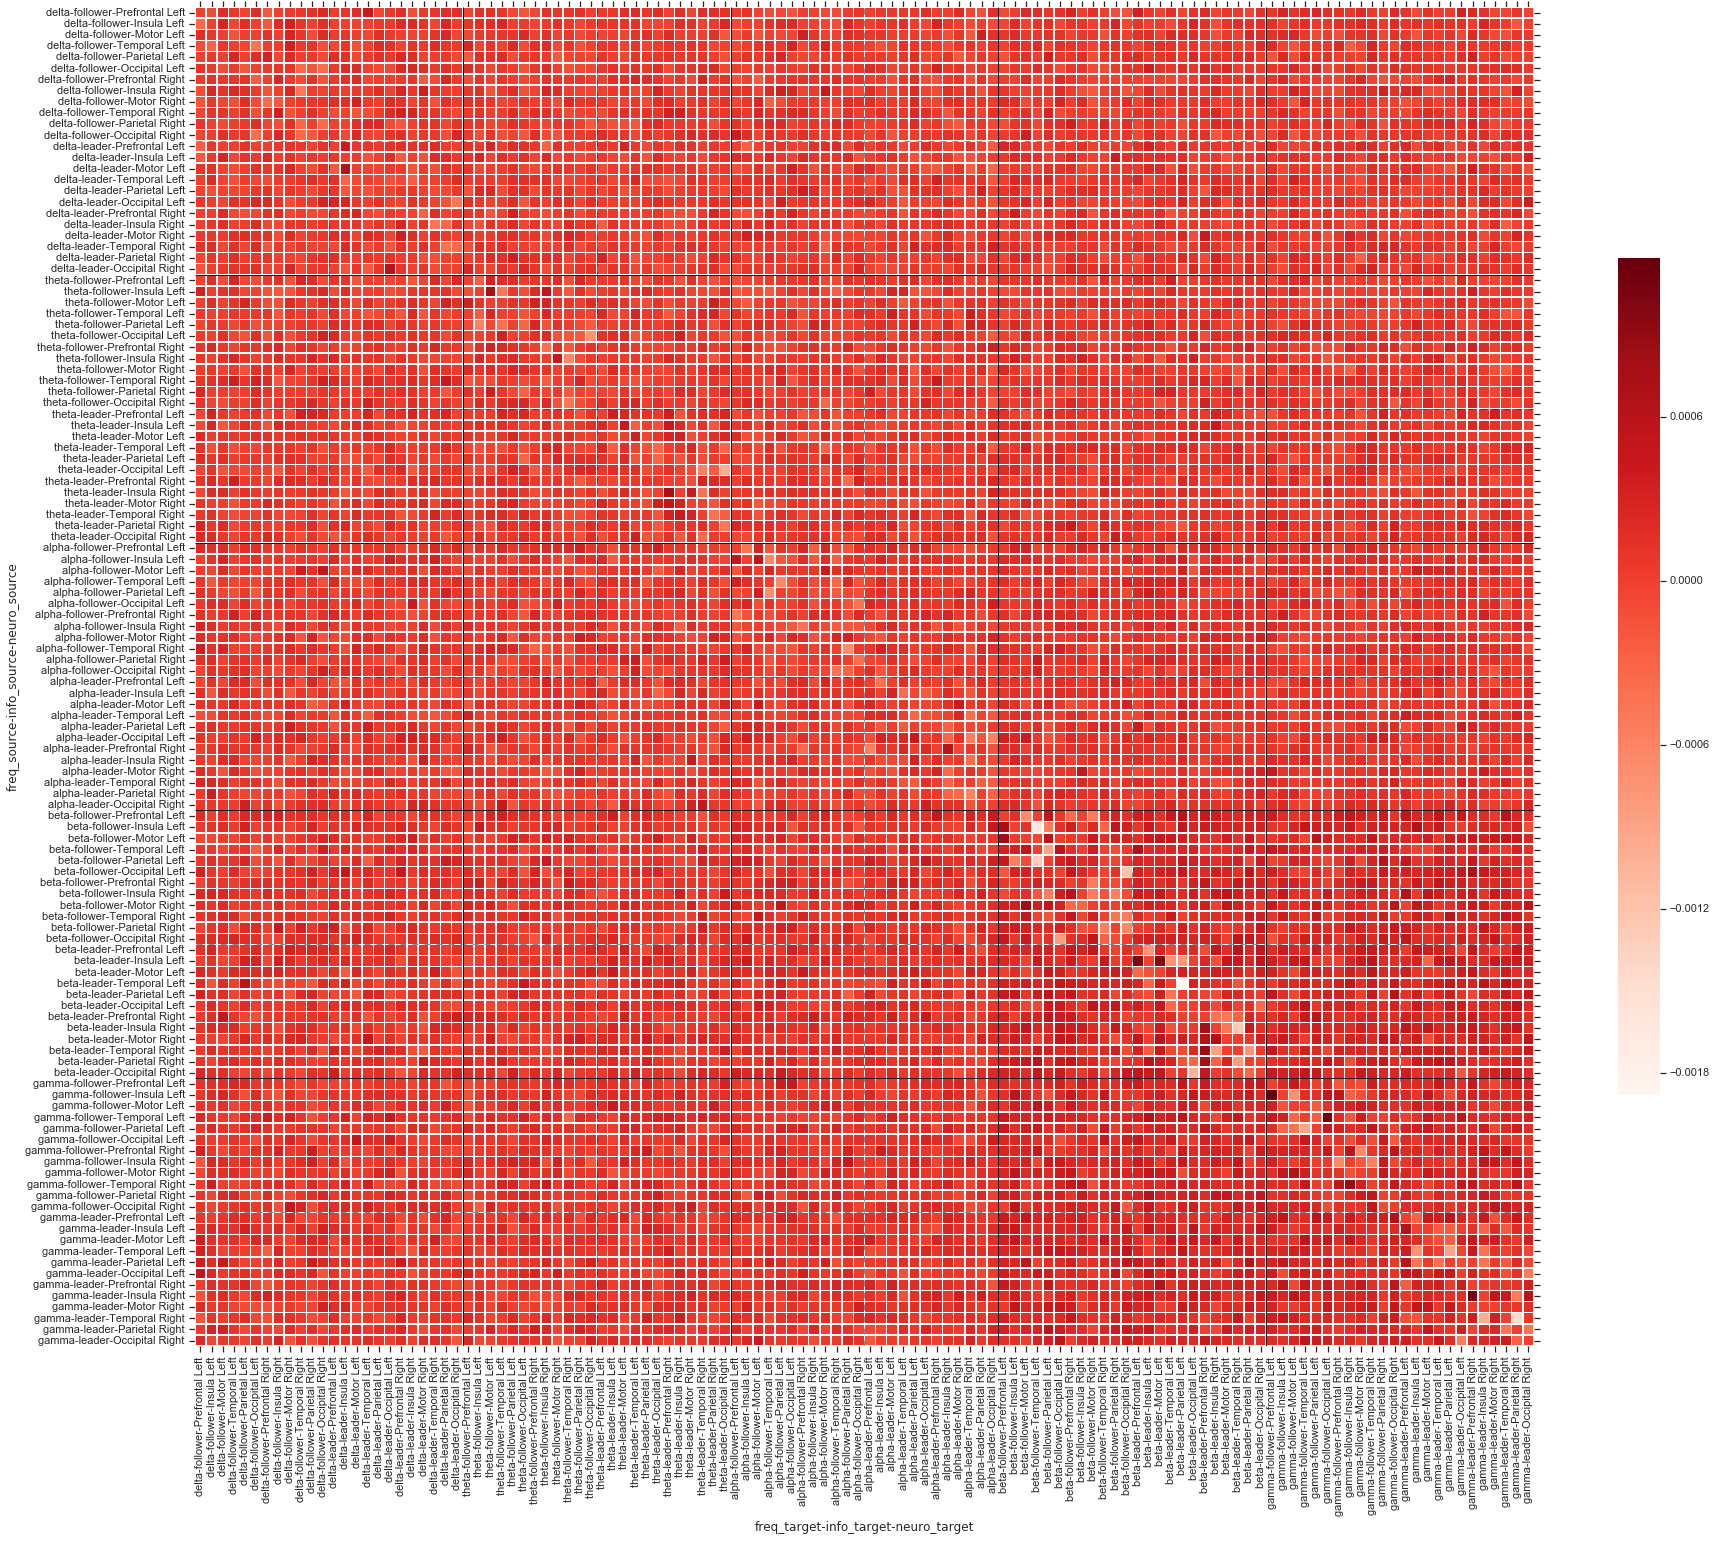

In [185]:
# Homophonic vs Polyphonic
fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap((polyphonic_matrix-homophonic_matrix), cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.hlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.vlines(range(12, 121, 12), 120, 0, linewidth = 0.5, linestyle = '--')
plt.vlines(range(24, 121, 24), 120, 0, linewidth = 1)
plt.show()

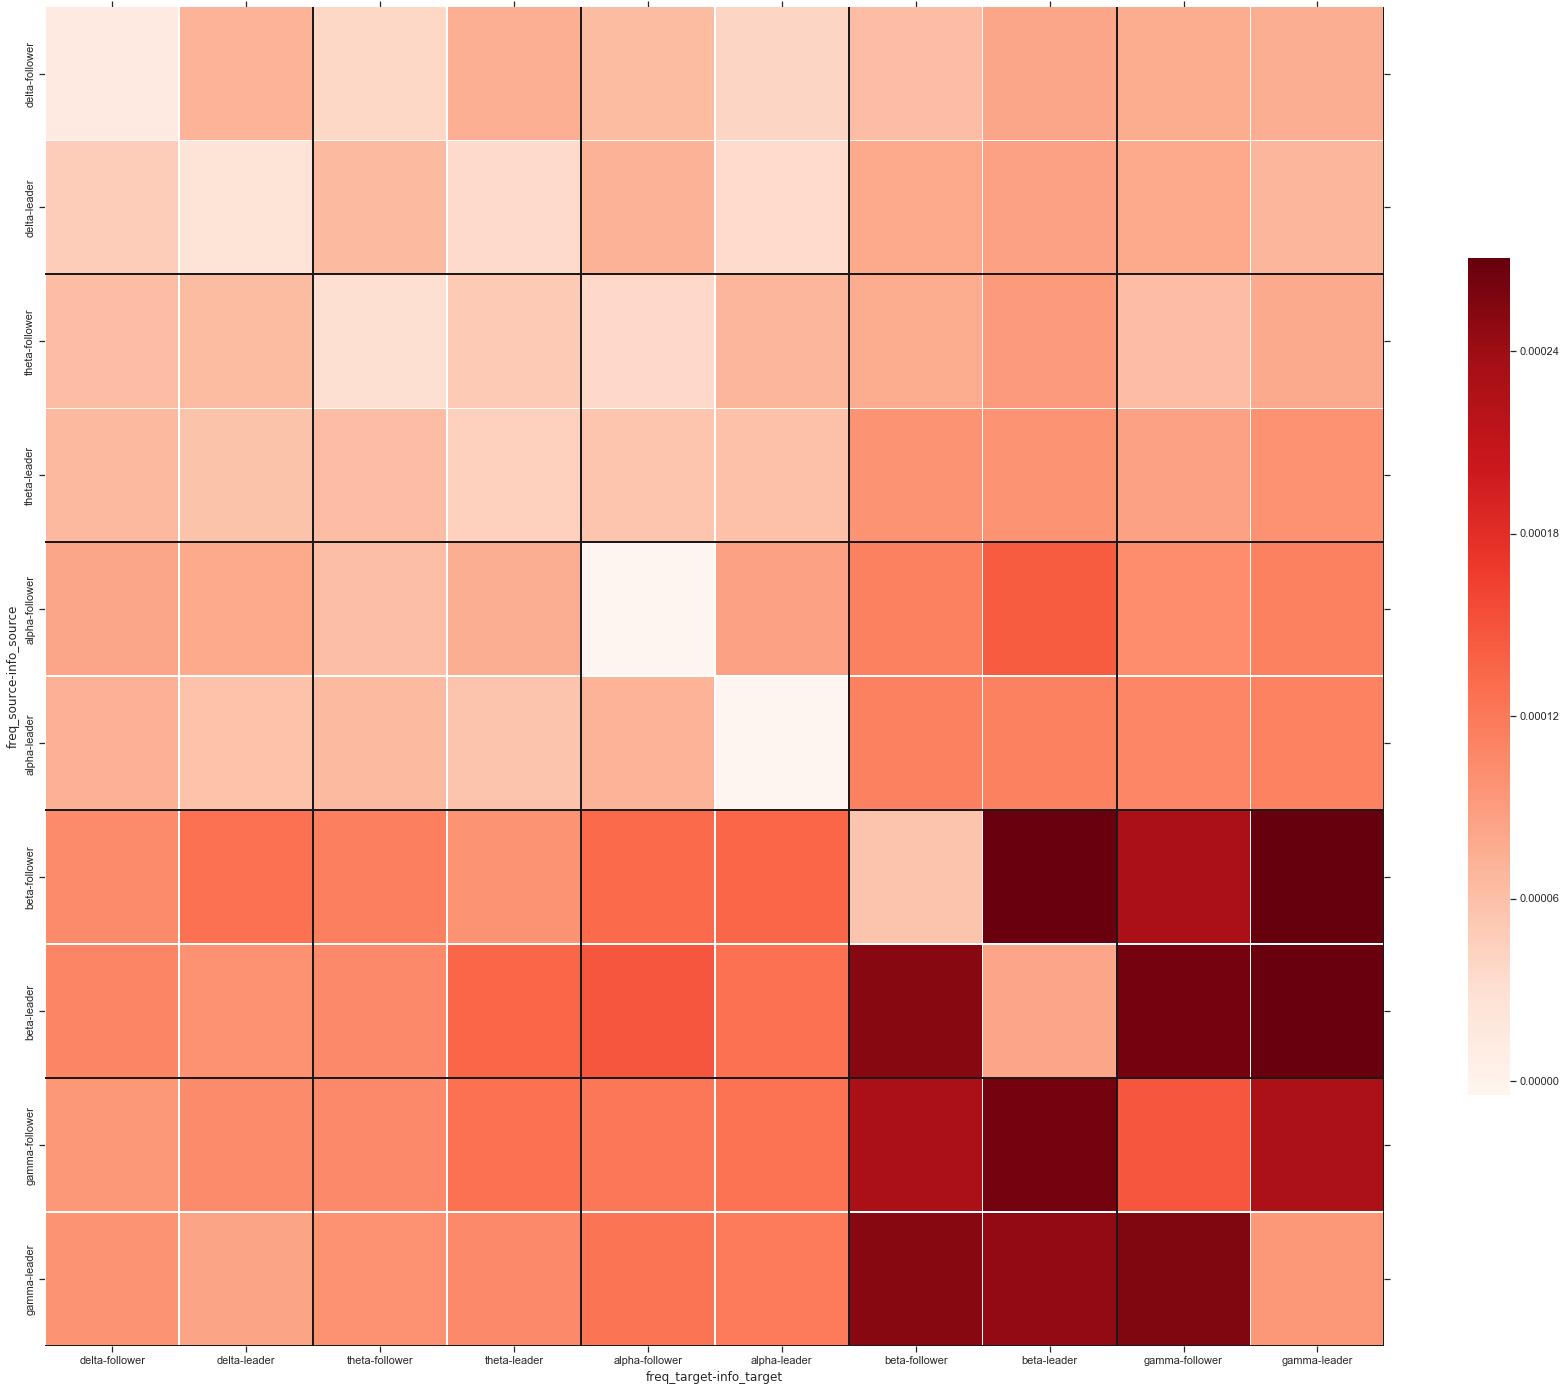

In [186]:
fig, axs = plt.subplots(1,1, figsize=(30, 30))
sns.heatmap((polyphonic_matrix_frequencies-homophonic_matrix_frequencies), cmap='Reds', square=True, linewidths=.5, ax = axs, cbar_kws = {'shrink': 0.5})
plt.hlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.vlines(range(2, 11, 2), 10, 0, linewidth = 2)
plt.show()

## Graph theory analysis

In [7]:
# Get trials as a function of time
piece_1 = grand_df[grand_df['piece'] == 'val']
piece_1 = piece_1.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean).values

# Get trials as a function of time
piece_2 = grand_df[grand_df['piece'] == 'mel']
piece_2 = piece_2.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean).values

# Get trials as a function of time
piece_3 = grand_df[grand_df['piece'] == 'clo']
piece_3 = piece_3.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean).values

# Get trials as a function of time
piece_4 = grand_df[grand_df['piece'] == 'can']
piece_4 = piece_4.pivot_table(index = ['freq_source', 'info_source', 'neuro_source'], 
                                                  columns = ['freq_target', 'info_target', 'neuro_target'], 
                                                  values = 'ste', aggfunc = np.mean).values

In [86]:
# First we get clustering coefficient 
clust_coef = map(bct.clustering_coef_wd, [piece_1, piece_2, piece_3, piece_4])
clust_coef = map(np.mean, clust_coef)
clust_coef
graph_theory_df = pd.DataFrame(data = clust_coef, columns = ['value'])
graph_theory_df['statistic'] = ['clustering_coefficient'] * 4
graph_theory_df['block'] = [1, 2, 3, 4] 
graph_theory_df

,value,statistic,block
0,0.000620,clustering_coefficient,1
1,0.000662,clustering_coefficient,2
2,0.000723,clustering_coefficient,3
3,0.000762,clustering_coefficient,4


In [87]:
# Now we get characteristic path length. We first get the distance matrix
pieces = [piece_1, piece_2, piece_3, piece_4]
charac_path_length = np.zeros(4)
bct_efficiency = np.zeros(4)

for i in range(4):
    distance_matrix, _ = bct.distance_wei(pieces[i])
    charac_path_length[i], bct_efficiency[i], _,_,_ = bct.charpath(distance_matrix, include_diagonal=False)

In [88]:
temp_df = pd.DataFrame(data = charac_path_length, columns = ['value'])
temp_df['statistic'] = ['charac_path_length'] * 4
temp_df['block'] = [1, 2, 3, 4] 
graph_theory_df = graph_theory_df.append(temp_df)
graph_theory_df

,value,statistic,block
0,0.000620,clustering_coefficient,1
1,0.000662,clustering_coefficient,2
2,0.000723,clustering_coefficient,3
3,0.000762,clustering_coefficient,4
0,0.000566,charac_path_length,1
1,0.000604,charac_path_length,2
2,0.000649,charac_path_length,3
3,0.000676,charac_path_length,4


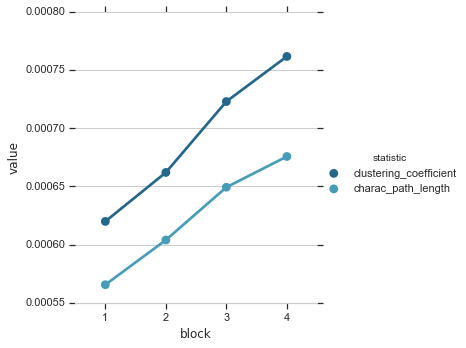

In [96]:
sns.set(style="whitegrid")
sns.catplot(x="block", y="value", hue="statistic",
                capsize=.2, palette="YlGnBu_d", #height=6, aspect=.75,
                kind="point", data=graph_theory_df)
sns.despine(left=True)
plt.show()